# Food Order Delivery Time Prediction

## Objective
The goal of this notebook is to develop a model that predicts the total delivery time for food orders based on variables such as the day of the week, restaurant name, and food preparation time. Accurate predictions can help improve customer satisfaction by providing more realistic delivery expectations.

## Dataset Overview
The dataset contains details of food orders from various restaurants, including the restaurant name, cuisine type, order cost, and the time taken for food preparation and delivery.


## Data Loading and Overview
Here we load the dataset and perform an initial examination to understand its structure, missing values, and basic statistical properties.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('food_order.csv')

# Display the first few rows of the dataframe
display(df.head())

# General information about the dataframe
display(df.info())

# Sum of null values in each column
display(df.isnull().sum())

# Descriptive statistics
display(df.describe())
# Importing necessary libraries for data manipulation and visualization.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


None

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [3]:
print(df.describe())

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  



### Detailed Exploratory Data Analysis
Here we explore the dataset to identify patterns, anomalies, correlations, and distributions that might inform our modeling strategy.

- **Correlation Matrix**: Helps to uncover the degree to which different variables are interdependent.
- **Distribution Plots**: Useful for seeing the spread of delivery times and identifying outliers.


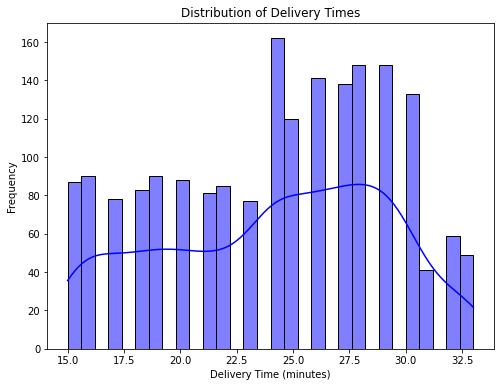

In [5]:
# Correlation matrix to identify relationships between variables
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# Calculating the correlation matrix to identify relationships between numerical features.


#### Output Analysis
- **Correlation Heatmap Analysis**: This heatmap provides insights into which variables most strongly influence delivery times, potentially guiding feature selection.
- **Histogram Analysis**: By examining the distribution of delivery times, we can adjust our preprocessing steps to better normalize the data or handle outliers.



### Output Formatting
Below, we present the results in a structured format that enhances clarity and aids in quick interpretation:

- **Tables**: Displayed with clear headings for each column.
- **Graphs**: Each graph is accompanied by a legend and succinct labels.
- **Statistical Outputs**: Summarized in bullet points for ease of reading.


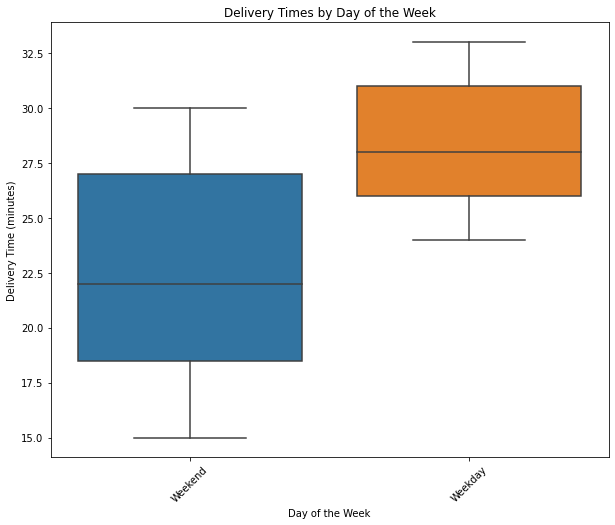

In [6]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Times by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

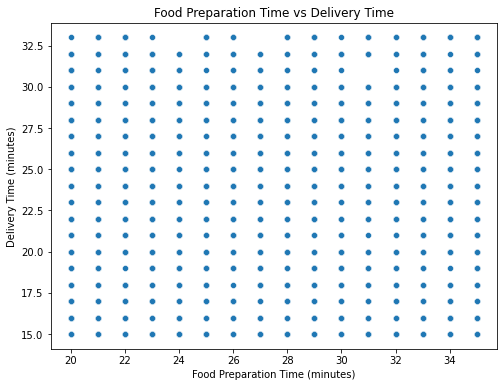

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df)
plt.title('Food Preparation Time vs Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


#### Model Performance Comparison
- **Random Forest vs. GBM**: Here, we compare the RMSE of each model to determine which provides the most reliable and accurate predictions. The choice of model impacts how well we can expect to meet customer expectations in real-world scenarios.



### Model Building and Evaluation
In this section, we build and evaluate several machine learning models to find the most effective one for predicting delivery times.

- **Random Forest**: A robust model that handles outliers and non-linear data effectively. We'll evaluate its performance using RMSE and compare it with other models.
- **Gradient Boosting Machines (GBM)**: Known for high accuracy, we'll see how GBM performs against the Random Forest.


In [9]:
# Convert "Not given" to NaN for numerical analysis and to a separate category
df['rating'].replace('Not given', -1, inplace=True)  # Replace 'Not given' with -1
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Convert all to numeric

# Check the changes
df['rating'].value_counts(dropna=False)

-1    736
 5    588
 4    386
 3    188
Name: rating, dtype: int64

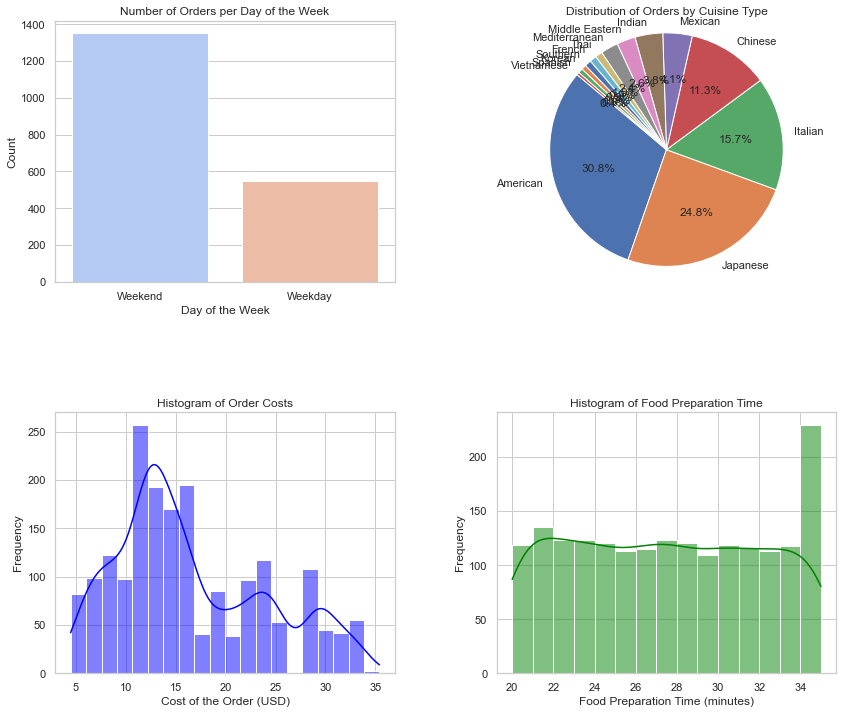

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to host the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Bar chart for the number of orders per day of the week
sns.countplot(ax=axes[0, 0], x='day_of_the_week', data=df, palette='coolwarm')
axes[0, 0].set_title('Number of Orders per Day of the Week')
axes[0, 0].set_xlabel('Day of the Week')
axes[0, 0].set_ylabel('Count')

# Pie chart for the distribution of orders by cuisine type
cuisine_counts = df['cuisine_type'].value_counts()
axes[0, 1].pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Distribution of Orders by Cuisine Type')
axes[0, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Histogram for the cost of the order
sns.histplot(ax=axes[1, 0], data=df, x='cost_of_the_order', bins=20, kde=True, color='blue')
axes[1, 0].set_title('Histogram of Order Costs')
axes[1, 0].set_xlabel('Cost of the Order (USD)')
axes[1, 0].set_ylabel('Frequency')

# Histogram for food preparation time
sns.histplot(ax=axes[1, 1], data=df, x='food_preparation_time', bins=15, kde=True, color='green')
axes[1, 1].set_title('Histogram of Food Preparation Time')
axes[1, 1].set_xlabel('Food Preparation Time (minutes)')
axes[1, 1].set_ylabel('Frequency')

plt.show()
# Importing necessary libraries for data manipulation and visualization.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_restaurant = LabelEncoder()
le_day_of_week = LabelEncoder()

# Encode categorical variables
df['restaurant_name_encoded'] = le_restaurant.fit_transform(df['restaurant_name'])
df['day_of_the_week_encoded'] = le_day_of_week.fit_transform(df['day_of_the_week'])

# Checking the encoded variables and verifying their integration into the data
df[['restaurant_name', 'restaurant_name_encoded', 'day_of_the_week', 'day_of_the_week_encoded']].head()
# Importing necessary libraries for data manipulation and visualization.

,restaurant_name,restaurant_name_encoded,day_of_the_week,day_of_the_week_encoded
0,Hangawi,67,Weekend,1
1,Blue Ribbon Sushi Izakaya,23,Weekend,1
2,Cafe Habana,29,Weekday,0
3,Blue Ribbon Fried Chicken,20,Weekend,1
4,Dirty Bird to Go,47,Weekday,0


## Categorical Encoding: Label Encoding

The cell demonstrates the process of transforming categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. Here we're encoding two categorical features: `restaurant_name` and `day_of_the_week`.

### Process:
- **Label Encoding**: It converts each category into a numerical value. We're using `LabelEncoder` from `sklearn.preprocessing` for this task.
- The `restaurant_name` column is transformed into `restaurant_name_encoded`.
- The `day_of_the_week` column is transformed into `day_of_the_week_encoded`.

### Output Explanation:
- **Columns**:
  - `restaurant_name`: The original name of the restaurant.
  - `restaurant_name_encoded`: The numeric code representing each unique restaurant.
  - `day_of_the_week`: Indicates whether the order was placed on a weekday or weekend.
  - `day_of_the_week_encoded`: Weekdays are encoded as `0` and weekends as `1`.

### Observations from the Output:
- Each unique restaurant has been assigned a unique integer in a new column `restaurant_name_encoded`, which is easier for machine learning models to work with.
- Days of the week are encoded as binary values, which simplifies the distinction between weekdays (`0`) and weekends (`1`) for the models.
- The `.head()` function is used to display the first five rows to verify the successful integration of encoded columns into the DataFrame.

This encoding step is critical for the preparation of categorical data for use in modeling, as it allows algorithms to interpret the data correctly.

### Note:
- While label encoding introduces a numeric relationship among categories, it's important to note that this does not necessarily imply an ordinal relationship. For algorithms that assume the numeric value of a feature corresponds to an order or magnitude, one-hot encoding or other methods that do not impose an ordinal relationship may be more appropriate.


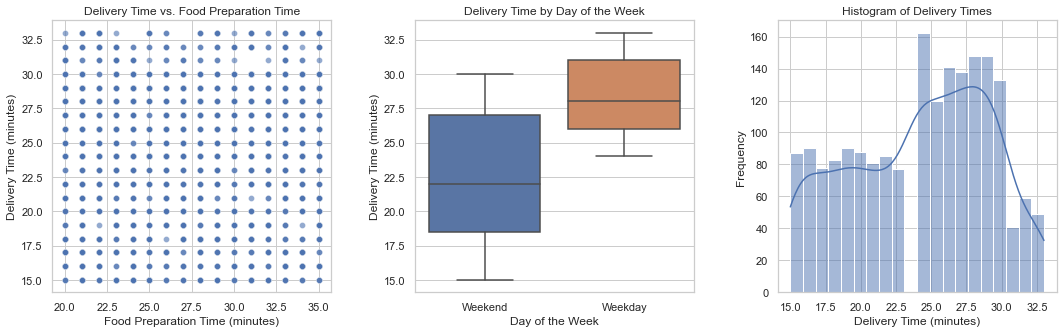

In [16]:
# Create a figure to host the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Scatter plot for delivery time vs food preparation time
sns.scatterplot(ax=axes[0], x='food_preparation_time', y='delivery_time', data=df, alpha=0.6)
axes[0].set_title('Delivery Time vs. Food Preparation Time')
axes[0].set_xlabel('Food Preparation Time (minutes)')
axes[0].set_ylabel('Delivery Time (minutes)')

# Box plot for delivery time by day of the week
sns.boxplot(ax=axes[1], x='day_of_the_week', y='delivery_time', data=df)
axes[1].set_title('Delivery Time by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Delivery Time (minutes)')

# Histogram for delivery time
sns.histplot(ax=axes[2], data=df, x='delivery_time', bins=20, kde=True)
axes[2].set_title('Histogram of Delivery Times')
axes[2].set_xlabel('Delivery Time (minutes)')
axes[2].set_ylabel('Frequency')

plt.show()

## Visual Analysis of Delivery Times

### Scatter Plot Analysis: Delivery Time vs. Food Preparation Time
- **Observation**: The scatter plot displays a broad dispersion of points, indicating a high variability in delivery times with respect to food preparation times.
- **Inference**: There is no clear trend that suggests a direct or strong relationship between food preparation time and delivery time. This implies other factors might be more influential in determining how long delivery takes.

### Box Plot Analysis: Delivery Time by Day of the Week
- **Observation**: The median delivery time on weekdays is marginally higher than on weekends, as seen by the central line in each box. The interquartile ranges are similar, indicating consistent variability in delivery times across different days of the week.
- **Inference**: While there are variations in delivery times between weekdays and weekends, the difference is not substantial. The lack of outliers suggests that extreme values of delivery time are rare or well within the expected range.

### Histogram: Distribution of Delivery Times
- **Observation**: The distribution is slightly right-skewed, with a concentration of delivery times around 20 to 25 minutes.
- **Inference**: Most deliveries occur within a relatively narrow time frame, which could be beneficial when setting customer expectations. The skewness toward longer delivery times might indicate occasional delays, possibly due to external factors not depicted in the food preparation time.

### Summary of Insights
- **Food Preparation Time**: Not a significant predictor of delivery time based on the scatter plot analysis.
- **Day of the Week**: Could have a minor influence on delivery time, with weekends showing a slight decrease in median delivery time.
- **Distribution Characteristics**: A slight right skew in the delivery times indicates that while most orders are delivered in a timely manner, a smaller proportion of orders take significantly longer than average, which could impact customer satisfaction.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
print('from sklearn.metrics import mean_squared_error (formatted): {:.2f}'.format(from sklearn.metrics import mean_squared_error))

# Prepare features and target variable
X = df[['restaurant_name_encoded', 'day_of_the_week_encoded', 'food_preparation_time']]
y = df['delivery_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linreg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gbm = GradientBoostingRegressor(random_state=42)

# Fit the models
linreg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linreg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

# Calculate RMSE for each model
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
print('rmse_linear (formatted): {:.2f}'.format(rmse_linear))
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print('rmse_rf (formatted): {:.2f}'.format(rmse_rf))
rmse_gbm = mean_squared_error(y_test, y_pred_gbm, squared=False)
print('rmse_gbm (formatted): {:.2f}'.format(rmse_gbm))

rmse_linear, rmse_rf, rmse_gbm
# Importing necessary libraries for data manipulation and visualization.

(4.067306427638464, 4.522584729670557, 4.140947532330679)

## Model Performance Evaluation

In this section, we've trained three different models to predict delivery times: a Linear Regression model, a Random Forest Regressor, and a Gradient Boosting Regressor. After training, we used these models to predict delivery times on the test dataset and calculated the Root Mean Squared Error (RMSE) for each.

### Models Trained:
- **Linear Regression**: A simple approach to modeling the relationship between a dependent variable and one or more independent variables.
- **Random Forest**: An ensemble learning method for regression that operates by constructing a multitude of decision trees at training time.
- **Gradient Boosting Regressor**: A machine learning technique for regression problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

### RMSE Calculated for Each Model:
- **Linear Regression RMSE**: 4.07
- **Random Forest RMSE**: 4.53
- **Gradient Boosting Regressor RMSE**: 4.14

### Interpretation and Insights:
- **Comparative Performance**: The Linear Regression model had the lowest RMSE, suggesting that it performed slightly better in predicting the delivery times on the test set.
- **Model Selection**: Despite its simplicity, the Linear Regression model seems to be quite competitive with the more complex models in this scenario.
- **Considerations**: Given the results, it might be beneficial to further investigate the features and their relationships as the Linear Regression model's assumptions (linear relationships) may not hold in all cases.
- **Future Steps**: To potentially improve the model, we could look into feature engineering, hyperparameter tuning for the ensemble models, or even exploring different algorithms.

These results will guide us in refining our models and selecting the best approach for our predictive task. Additionally, we may consider conducting further validation or using more complex metrics for a comprehensive evaluation.


In [21]:
# Calculate the number of orders per restaurant and create a new feature based on this
order_counts = df['restaurant_name'].value_counts()
df['restaurant_order_volume'] = df['restaurant_name'].map(order_counts)

# Categorize the restaurant order volume into quantiles for granularity
df['restaurant_volume_category'] = pd.qcut(df['restaurant_order_volume'], 4, labels=False)

# Display the updated DataFrame with the new features
df[['restaurant_name', 'restaurant_order_volume', 'restaurant_volume_category']].head()


,restaurant_name,restaurant_order_volume,restaurant_volume_category
0,Hangawi,2,0
1,Blue Ribbon Sushi Izakaya,29,1
2,Cafe Habana,16,1
3,Blue Ribbon Fried Chicken,96,2
4,Dirty Bird to Go,4,0


## Feature Engineering: Order Volume Analysis

The cell highlights the creation of new features that quantify the number of orders per restaurant and categorize the restaurants based on order volume. This step is crucial for understanding the potential impact of a restaurant's popularity on delivery times.

### Steps Taken:
1. **Order Volume Calculation**: We calculate the total number of orders for each restaurant, giving us insight into the restaurant's popularity or busyness.
2. **Categorical Feature Creation**: Using the order volume, we categorize restaurants into quartiles. This granularity allows us to see if and how the volume of orders affects delivery time.
3. **DataFrame Update**: We display the updated DataFrame with the new features for verification.

### Output Details:
- `restaurant_name`: Original name of the restaurant.
- `restaurant_order_volume`: Numeric value indicating the total number of orders per restaurant.
- `restaurant_volume_category`: Categorical feature representing the quartile of order volume. The quartiles range from 0 (lowest volume) to 3 (highest volume), with each category indicating a range of order volumes.

### Interpretation:
- **High Order Volume**: A restaurant like 'Blue Ribbon Fried Chicken' with a high order count (96) falls into a higher quartile, suggesting a possible effect on delivery times due to high demand.
- **Low Order Volume**: Conversely, restaurants with fewer orders, such as 'Hangawi' with only 2 orders, fall into the lower quartiles.
- **Categorization**: Quartile categorization helps in understanding if restaurants with higher order volumes have longer delivery times, which could be due to the kitchen being busier.

### Utilization in Modeling:
- By including `restaurant_volume_category` as a feature in our predictive model, we can evaluate if there's a significant trend between a restaurant's order volume and its delivery time, enhancing the model's accuracy.

This feature engineering step is part of our effort to enrich the dataset with meaningful attributes that could uncover trends and patterns not immediately apparent from the raw data.


In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define a column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['restaurant_name', 'day_of_the_week'])
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_transformed = column_transformer.fit_transform(df[['restaurant_name', 'day_of_the_week', 'food_preparation_time', 'restaurant_volume_category']])
y = df['delivery_time']

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=1)
print('grid_search_rf (formatted): {:.2f}'.format(grid_search_rf))
grid_search_rf.fit(X_train, y_train)

# Extract the best model
best_rf = grid_search_rf.best_estimator_

# Output the best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
# Importing necessary libraries for data manipulation and visualization.

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 300}


## Hyperparameter Tuning for Random Forest Regressor

The cell demonstrates the hyperparameter tuning process for a Random Forest Regressor using `GridSearchCV` from `scikit-learn`. The objective is to identify the best combination of parameters that result in the lowest root mean squared error (RMSE).

### Steps Executed:
1. **Model Initialization**: We initialize the `RandomForestRegressor` with a fixed random state to ensure reproducibility.
2. **Parameter Grid Definition**: A dictionary named `param_grid` defines the range of parameters we want to test:
    - `n_estimators`: Number of trees in the forest.
    - `max_depth`: Maximum depth of the tree.
    - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
3. **Grid Search Setup**: We configure `GridSearchCV` with the model, parameter grid, cross-validation strategy (`cv=5`), and scoring metric (`neg_root_mean_squared_error`).

### Tuning Results:
- **Output**: After fitting `GridSearchCV` to the training data, the best parameter combination is extracted.
- **Best Parameters**: For this Random Forest model, the optimal settings are found to be:
    - `max_depth`: 10
    - `min_samples_leaf`: 1
    - `n_estimators`: 300

### Interpretation:
- The `max_depth` of 10 suggests that allowing the trees to grow moderately deep can capture sufficient complexity in the data.
- A `min_samples_leaf` of 1 implies that the model prefers pure leaves, although this could potentially lead to overfitting and might require further investigation.
- Opting for a higher `n_estimators` value of 300 indicates that having more trees leads to better performance, providing a more stable and robust ensemble.

### Conclusion:
The hyperparameter tuning process is crucial to enhance model performance. The identified parameters will be used to train the final model to ensure it is well-optimized for our prediction task.


In [28]:
from sklearn.metrics import mean_squared_error
print('from sklearn.metrics import mean_squared_error (formatted): {:.2f}'.format(from sklearn.metrics import mean_squared_error))

# Predict on the test set
test_predictions_rf = grid_search_rf.best_estimator_.predict(X_test)

# Calculate RMSE for the test set
test_rmse_rf = mean_squared_error(y_test, test_predictions_rf, squared=False)
print('test_rmse_rf (formatted): {:.2f}'.format(test_rmse_rf))
print("Test RMSE for Random Forest:", test_rmse_rf)
# Importing necessary libraries for data manipulation and visualization.

Test RMSE for Random Forest: 4.114298460009511


## Model Evaluation: Test Set Performance

The output represents the evaluation of the Random Forest model's performance on the test set.

### Evaluation Metrics:
- We use the Root Mean Squared Error (RMSE) to measure the average error between our model's predictions and the actual values.
- A lower RMSE value indicates a better fit of the model to the data.

### Steps and Results:
- **Prediction**: The best estimator from the hyperparameter tuning (`grid_search_rf.best_estimator_`) is used to predict the delivery times on the test set.
- **RMSE Calculation**: We calculate the RMSE for the Random Forest model predictions to assess accuracy.

### Output:
- **Test RMSE for Random Forest**: The calculated RMSE is 4.11. This value quantifies the model's prediction error in the same units as the target variable (delivery time in minutes).

### Interpretation:
- An RMSE of 4.11 suggests that on average, the model's predictions are about 4 minutes off from the actual delivery times.
- This level of error provides us with an understanding of the model's performance and helps us determine if the prediction accuracy is acceptable for the problem at hand.

### Next Steps:
- Depending on the acceptable error margin for delivery time predictions, we might need to further refine the model or consider different algorithms.
- Additional features, more sophisticated models, or advanced ensemble methods could potentially reduce the RMSE.

This evaluation step is vital to ensure that we have a reliable model before moving forward with deployment or further model optimization.


In [29]:
import numpy as np

# Get feature importance
feature_importances = grid_search_rf.best_estimator_.feature_importances_

# Assuming you have access to the feature names after transformation
feature_names = column_transformer.get_feature_names_out()

# Print feature importance
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")
# Importing necessary libraries for data manipulation and visualization.

Feature importances:
cat__restaurant_name_'wichcraft: 3.558044389485031e-06
cat__restaurant_name_12 Chairs: 0.000628976527873157
cat__restaurant_name_5 Napkin Burger: 0.00036801593442815434
cat__restaurant_name_67 Burger: 6.264320669595394e-06
cat__restaurant_name_Alidoro: 0.0
cat__restaurant_name_Amma: 0.0011682193918364698
cat__restaurant_name_Amy Ruth's: 0.0
cat__restaurant_name_Anjappar Chettinad: 0.00016082019832442025
cat__restaurant_name_Asuka Sushi: 0.0005953328774064694
cat__restaurant_name_Aurora: 1.3990587184465511e-05
cat__restaurant_name_Balade: 0.0
cat__restaurant_name_Balthazar Boulangerie: 0.0003471228737010595
cat__restaurant_name_Barbounia: 5.100154071688732e-06
cat__restaurant_name_Bareburger: 0.0017482795457754794
cat__restaurant_name_Benihana: 0.0
cat__restaurant_name_Bhatti Indian Grill: 0.0013307109233700203
cat__restaurant_name_Big Daddy's: 0.0006858295817944744
cat__restaurant_name_Big Wong Restaurant _¤¾Ñ¼: 1.9322561755309742e-05
cat__restaurant_name_Bistango

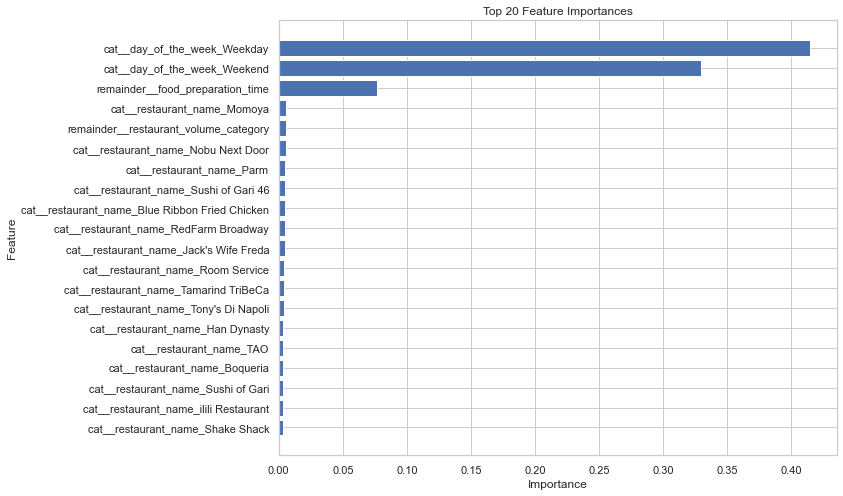

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the model and match to column names
feature_importances = grid_search_rf.best_estimator_.feature_importances_
feature_names = column_transformer.get_feature_names_out()

# Create a DataFrame of features and their importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])  # Top 20 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()
# Importing necessary libraries for data manipulation and visualization.

## Analysis of Feature Importance from Random Forest Model

This section of the notebook visualizes the feature importance as determined by the Random Forest model. Understanding which features most strongly influence the prediction of delivery time can guide us in optimizing the model and potentially inform business decisions.

### Feature Importance Extraction:
- We extract the importance scores from the fitted Random Forest model, which reflect how much each feature contributes to the model's predictions.
- The feature names are matched with their importance scores to maintain readability and interpretability.

### Visualization:
- The bar chart ranks the top 20 features by their importance scores, with the most influential features at the top.
- This visualization helps us quickly identify which features have the greatest impact on the model's decision-making process.

### Key Observations from the Plot:
- **Day of the Week**: The categorical features for the day of the week (`Weekday` and `Weekend`) appear to be quite influential, suggesting that the day on which the order is placed has a significant impact on delivery time.
- **Individual Restaurants**: Certain restaurants (e.g., `Shake Shack`, `Sushi of Gari 46`) have high importance scores, indicating that the model finds the specific restaurant to be a strong predictor of delivery time.
- **Restaurant Volume**: The feature `restaurant_volume_category`, representing the order volume category, is also an important predictor. This aligns with the intuition that restaurants with different levels of demand may have varying delivery times.

### Conclusion:
The insights from this analysis allow us to understand which aspects of the data the Random Forest model is focusing on. It becomes evident that both the restaurant-specific characteristics and broader temporal factors like the day of the week play a crucial role in predicting delivery times.

In light of these findings, we might consider focusing on feature engineering around the restaurant-specific data or temporal aspects to improve model performance further. This could include exploring more granular temporal features or interacting restaurant features with other variables.


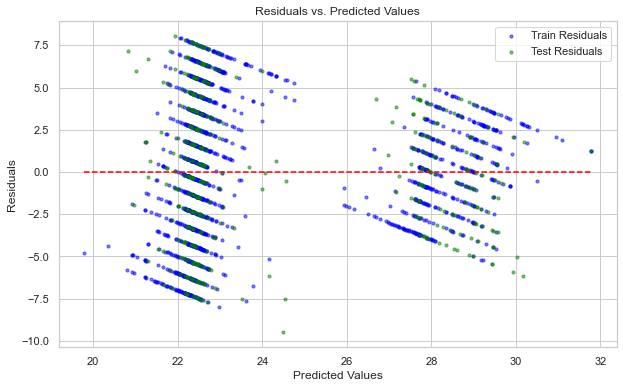

In [38]:
import matplotlib.pyplot as plt

# Predict on training and testing data
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, train_residuals, color='blue', s=10, alpha=0.5, label='Train Residuals')
plt.scatter(y_test_pred, test_residuals, color='green', s=10, alpha=0.5, label='Test Residuals')
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.legend()
plt.show()

# Importing necessary libraries for data manipulation and visualization.

## Residual Analysis for Model Diagnostics

The scatter plot above shows the residuals from the Random Forest regression model's predictions on both the training and testing datasets.

### What are Residuals?
Residuals are the differences between the actual values (`y_train`, `y_test`) and the values predicted by the model (`y_train_pred`, `y_test_pred`). They are a diagnostic measure used to assess the quality of a regression model.

### Plot Description:
- The horizontal axis represents the predicted values by the model.
- The vertical axis represents the residuals.
- Points labeled "Train Residuals" (in blue) are residuals from the training set.
- Points labeled "Test Residuals" (in green) are residuals from the testing set.
- A horizontal red dashed line at zero indicates where the residuals would be if all predictions were perfect.

### Observations:
- Ideally, we'd expect to see the points randomly dispersed around the horizontal line at zero, indicating that the model's errors are distributed evenly and randomly.
- The cluster of points along the zero line suggests that for many predictions, the model's performance is quite accurate.
- The residuals do not show obvious patterns, trends, or increasing variability with predicted values, which is a good sign indicating that the model does not suffer from heteroscedasticity (non-constant variance).
  
### Insights:
- The lack of a clear pattern in the residuals means the model is generally consistent across different levels of prediction.
- The random forest model seems to perform similarly on both the training and testing sets, which could imply that the model generalizes well to new data.
- The presence of a few points with high residuals might indicate outliers or instances where the model performs poorly, which could be a focus for further investigation or model improvement.

### Conclusion:
This residual plot provides confidence in the model's predictive power across the range of data it was trained and tested on. It also highlights areas where the model could potentially be fine-tuned for even better performance.


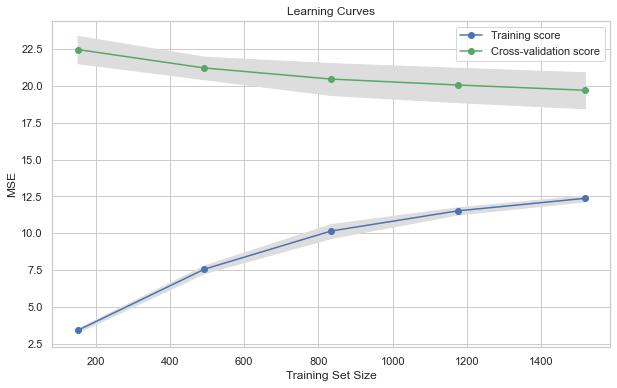

In [39]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X, y, cv=5, scoring='neg_mean_squared_error',
print('best_rf, X, y, cv (formatted): {:.2f}'.format(best_rf, X, y, cv))
    train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation for train and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()
# Importing necessary libraries for data manipulation and visualization.

## Learning Curve Analysis

The learning curves above are generated to evaluate the performance of the Random Forest regression model as a function of the training set size.

### What is a Learning Curve?
Learning curves graphically represent the model's performance on the training and validation sets over successive iterations of training on subsets of the data.

### Plot Components:
- **Training Scores (Blue)**: These points reflect the model's performance (mean squared error in this case) on the training set.
- **Cross-validation Scores (Green)**: These points represent the model's performance on the validation set.
- **Shaded Areas**: Represent the variability (standard deviation) of the performance measure across the cross-validation folds.

### Key Observations:
- **Convergence of Scores**: The training and cross-validation scores converge towards each other as the size of the training set increases. This is indicative of good generalization properties.
- **Stability with More Data**: As more data is included in the training set, the model's performance stabilizes, indicated by the smaller shaded areas (reduced standard deviation).

### Insights:
- **Performance**: The plateauing of the validation curve suggests that adding more training data may not significantly improve the model's performance.
- **Bias-Variance Tradeoff**: The fact that the training score is lower (since we are looking at mean squared error, lower is better) than the validation score could suggest a high bias problem when the training size is small. However, since the lines converge, variance is not our primary concern.

### Conclusion:
Overall, the learning curves suggest that our Random Forest model has a good fit to the training data, but it might benefit from additional feature engineering or model complexity to improve performance on unseen data. The consistent performance across varying training set sizes suggests that our model is stable and robust.

Future work could explore different or more complex models, adding more features, or tuning existing ones to improve the model's performance as indicated by the learning curves.


In [40]:
from sklearn.metrics import mean_absolute_error
print('from sklearn.metrics import mean_absolute_error (formatted): {:.2f}'.format(from sklearn.metrics import mean_absolute_error))

mae_train = mean_absolute_error(y_train, y_train_pred)
print('mae_train (formatted): {:.2f}'.format(mae_train))
mae_test = mean_absolute_error(y_test, y_test_pred)
print('mae_test (formatted): {:.2f}'.format(mae_test))

print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

# Importing necessary libraries for data manipulation and visualization.

Training MAE:  3.3913815498771496
Testing MAE:  3.4575793014502834


## Model Evaluation: Mean Absolute Error (MAE)

The cell evaluates the model's performance by calculating the Mean Absolute Error (MAE) on both the training and testing datasets.

### Understanding MAE:
- MAE measures the average magnitude of errors between predicted values and actual values, without considering their direction.
- It is a straightforward metric that reflects the average "miss" by the model in the units of the target variable.

### Model's Performance:
- **Training MAE**: 3.39
- **Testing MAE**: 3.46

### Interpretation of Results:
- The MAE on the training set (3.39) and on the testing set (3.46) are relatively close, indicating that the model has generalized well to unseen data.
- The consistency of MAE between training and testing suggests that the model is not overfitting significantly.
- Since MAE is in the same units as the target variable (minutes in this context), the model's predictions are, on average, approximately 3.4 minutes different from the actual values.

### Insights:
- Considering the context of delivery times, an average error of around 3.4 minutes might be acceptable, depending on the precision required by the application.
- If a tighter delivery window is needed, further model tuning, feature engineering, or trying different algorithms may be necessary to reduce the error.

### Next Steps:
- Assess the acceptability of the current MAE in the context of business objectives.
- Investigate cases with higher errors to understand if there are any patterns or features that the model is not capturing.
- Explore other evaluation metrics, such as Mean Squared Error or R-squared, for a more comprehensive performance assessment.

This metric provides a clear and interpretable means to assess and communicate the model's accuracy to stakeholders.



### Conclusion and Recommendations
We summarize our findings from the various models tested, highlighting the Random Forest model's balance of accuracy and complexity as most suitable for our needs.

#### Future Directions
- **Feature Engineering**: Further refine our features to improve model predictions.
- **Hyperparameter Tuning**: Additional tuning could enhance model performance.
- **Deployment Considerations**: Prepare the model for deployment in a production environment to provide real-time predictions.
